# Classification Assignment

The main goal of this assignment is to check in on your ability to access, load, explore, and make predictions using classification models.  For next Wednesday, you are to do the following:

1. Locate a dataset on Kaggle, NYC Open Data, UCI Machine Learning Repository, or other resource that contains data that can be addressed through a classification task
2. Load and explore the data for missing values and perform a brief EDA
3. Frame and state the classification problem
4. Split your data into train and test sets
4. Implement a `DummyClassifier`, `KNeighborsClassifier`, and `LogisticRegression` model.
5. Improve the models by performing a `GridSearchCV` for `n_neighbors` and `C` parameters respectively.  Include a scale transformation in your pipeline for KNN and a `PolynomialFeatures` step in the Logistic model.
6. Discuss the outcome of your classifiers using the `classification_report`.  Which did the best?  Do you prefer a recall or a precision oriented model?  Why?

**EXTRA**:

- Include `SGDClassifier`
- Incorporate AUC and ROC curves


In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [2]:
snads = pd.read_csv('data/Social_Network_Ads.csv')

In [3]:
snads.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [4]:
snads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


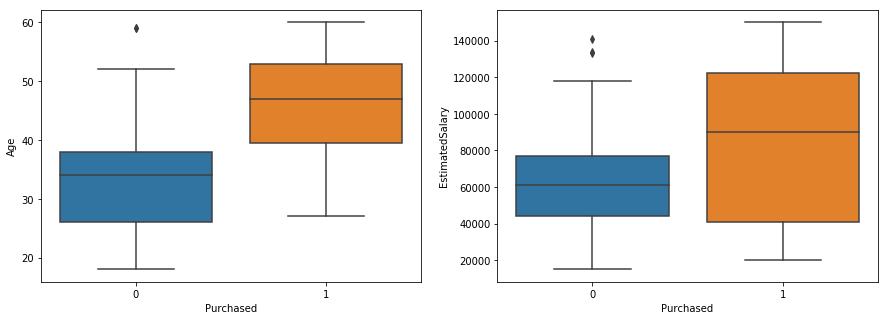

In [5]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.boxplot(x= 'Purchased', y='Age', data=snads)
plt.subplot(122)
sns.boxplot(x='Purchased', y='EstimatedSalary', data=snads)


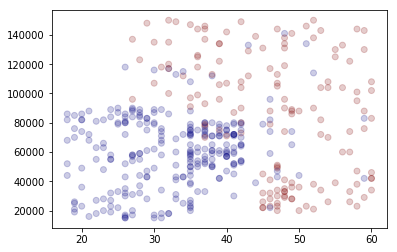

In [6]:
colors = pd.get_dummies(snads.Purchased, drop_first=True)
plt.scatter(snads.Age, snads.EstimatedSalary, c = colors[1], cmap='jet', alpha=0.2)

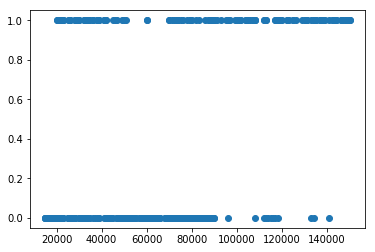

In [7]:
plt.plot(snads.EstimatedSalary, colors[1], 'o')

In [8]:
X = snads.EstimatedSalary.values.reshape(-1,1)
y = colors[1]
X_train, X_test, y_train, y_test = train_test_split(X,y)
clf = LogisticRegression()
clf.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
clf.intercept_

array([-1.59697958e-10])

In [10]:
clf.coef_

array([[-2.69301217e-06]])

In [11]:
clf.score(X_test,y_test)

0.62

In [12]:
clf.predict(60000)

array([0], dtype=uint8)

In [13]:
clf.predict_proba(60000)

array([[0.54030752, 0.45969248]])

In [14]:
y = clf.predict_proba(snads.EstimatedSalary.values.reshape(-1,1))

Text(0,0.5,'Probability of Purchase')

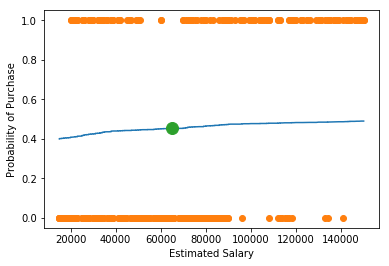

In [15]:
plt.plot(np.sort(snads.EstimatedSalary), np.sort(y[:, 1]))
plt.plot(snads.EstimatedSalary, colors[1], 'o')
plt.plot(65000, clf.predict_proba(65000)[:, 1], 'o', markersize = 12)
clf.predict_proba(65000)[:, 1]
plt.xlabel('Estimated Salary')
plt.ylabel('Probability of Purchase')

In [16]:
pipe = make_pipeline(PolynomialFeatures(), LogisticRegression())

In [17]:
params = {'polynomialfeatures__degree': [i for i in range (1,6)], 'logisticregression__C': [0.1, 1, 5, 10, 20, 50, 100]}

In [18]:
grid = GridSearchCV(pipe, param_grid=params, cv=10)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(snads.EstimatedSalary.values.reshape(-1,1), colors[1])

In [21]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('logisticregression', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5], 'logisticregression__C': [0.1, 1, 5, 10, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [23]:
grid.best_estimator_

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=1, include_bias=True, interaction_only=False)), ('logisticregression', LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [24]:
grid.best_estimator_.score(X_test,y_test)

0.61

In [87]:
X = snads.Age.values.reshape(-1,1)
y = snads.Purchased

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [89]:
lgr = LogisticRegression()
sgd = SGDClassifier()

In [90]:
lgr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [91]:
lgr.score(X_train, y_train)

0.84

In [92]:
sgd.fit(X_train, y_train)

/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [93]:
sgd.score(X_train, y_train)

0.6333333333333333

In [94]:
dum_dum= DummyClassifier(strategy = 'most_frequent')

In [95]:
dum_dum.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=None, strategy='most_frequent')

In [96]:
dum_dum.score(X_train, y_train)

0.6333333333333333

In [97]:
d_pred = dum_dum.predict(X_train)

In [98]:
sgd_prd = sgd.predict(X_train)

In [99]:
lgr_prd = lgr.predict(X_train)

In [100]:
confusion_matrix(y_train, sgd_prd)

array([[190,   0],
       [110,   0]])

In [101]:
confusion_matrix(y_train, lgr_prd)

array([[176,  14],
       [ 34,  76]])

In [102]:
confusion_matrix(y_train, d_pred)

array([[190,   0],
       [110,   0]])

In [104]:
print("Accuracy score for Logistic Regression model:\n{:.2f}".format(accuracy_score(y_train, lgr_prd)))
print("Accuracy score for SGD model: \n{:.2f}".format(accuracy_score(y_train, sgd_prd)))
print("Accuracy score for Dummy Classifer model: \n{:.2f}".format(accuracy_score(y_train, d_pred)))

Accuracy score for Logistic Regression model:
0.84
Accuracy score for SGD model: 
0.63
Accuracy score for Dummy Classifer model: 
0.63


In [105]:
print("Precision score for Logistic Regression model: \n", precision_score(y_train, lgr_prd))
print("Precision score for SGD model: \n", precision_score(y_train, sgd_prd))
print("Precision score for Dummy Classifer model: \n", precision_score(y_train, d_pred))

Precision score for Logistic Regression model: 
 0.8444444444444444
Precision score for SGD model: 
 0.0
Precision score for Dummy Classifer model: 
 0.0


/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [106]:
print("Recall score for Logistic Regression model: \n", recall_score(y_train, lgr_prd))
print("Recall score for SGD model: \n", recall_score(y_train, sgd_prd))
print("Recall score for Dummy Classifer model: \n", recall_score(y_train, d_pred))

Recall score for Logistic Regression model: 
 0.6909090909090909
Recall score for SGD model: 
 0.0
Recall score for Dummy Classifer model: 
 0.0


In [107]:
print("Logistic Regression full report\n", classification_report(y_train,lgr_prd))

Logistic Regression full report
              precision    recall  f1-score   support

          0       0.84      0.93      0.88       190
          1       0.84      0.69      0.76       110

avg / total       0.84      0.84      0.84       300



In [108]:
print("SGD full report\n", classification_report(y_train,sgd_prd))

SGD full report
              precision    recall  f1-score   support

          0       0.63      1.00      0.78       190
          1       0.00      0.00      0.00       110

avg / total       0.40      0.63      0.49       300



/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [109]:
print("Dummy full report\n", classification_report(y_train,d_pred))

Dummy full report
              precision    recall  f1-score   support

          0       0.63      1.00      0.78       190
          1       0.00      0.00      0.00       110

avg / total       0.40      0.63      0.49       300



/Users/sankokohtet/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [115]:
neigh = KNeighborsClassifier(n_neighbors=3)

In [116]:
neigh.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [117]:
K_prd = neigh.predict(X_train)